In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 1. Load Data

In [2]:
cc_info = pd.read_csv('/Users/ChunyanHao/desktop/github/ds_take_home/data/credit_card/cc_info.csv')
transactions = pd.read_csv('/Users/ChunyanHao/desktop/github/ds_take_home/data/credit_card/transactions.csv')

In [3]:
cc_info.head(5)

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [4]:
for column in cc_info.columns:
    uniques = cc_info[column].unique()
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

credit_card            984	 [1280981422329509 9737219864179988 4749889059323202 9591503562024072
 2095640259001271]
city                   124	 ['Dallas' 'Houston' 'Auburn' 'Orlando' 'New York']
state                   35	 ['PA' 'MA' 'WV' 'NY' 'NJ']
zipcode                124	 [18612 15342  1501 26412 10001]
credit_card_limit       28	 [ 6000 16000 14000 18000 20000]


In [5]:
cc_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit_card        984 non-null    int64 
 1   city               984 non-null    object
 2   state              984 non-null    object
 3   zipcode            984 non-null    int64 
 4   credit_card_limit  984 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.6+ KB


In [6]:
transactions.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


In [7]:
transactions['datetime'] = pd.to_datetime(transactions['date'])

transactions['date'] = transactions['datetime'].dt.date
transactions['time'] = transactions['datetime'].dt.time
transactions['year'] = transactions['datetime'].dt.year
transactions['month'] = transactions['datetime'].dt.month
transactions['day'] = transactions['datetime'].dt.day
transactions['weekday'] = transactions['datetime'].dt.weekday
transactions['hour'] = transactions['datetime'].dt.hour

In [8]:
transactions.head(3)

,credit_card,date,transaction_dollar_amount,Long,Lat,datetime,time,year,month,day,weekday,hour
0,1003715054175576,2015-09-11,43.78,-80.174132,40.267370,2015-09-11 00:32:40,00:32:40,2015,9,11,4,0
1,1003715054175576,2015-10-24,103.15,-80.194240,40.180114,2015-10-24 22:23:08,22:23:08,2015,10,24,5,22
2,1003715054175576,2015-10-26,48.55,-80.211033,40.313004,2015-10-26 18:19:36,18:19:36,2015,10,26,0,18


In [9]:
for column in transactions.columns:
    uniques = transactions[column].unique()
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

credit_card            984	 [1003715054175576 1013870087888817 1023820165155391 1073931538936472
 1077622576192810]
date                    92	 [datetime.date(2015, 9, 11) datetime.date(2015, 10, 24)
 datetime.date(2015, 10, 26) datetime.date(2015, 10, 22)
 datetime.date(2015, 10, 17)]
transaction_dollar_amount 30196	 [ 43.78 103.15  48.55 136.18  71.82]
Long                 294588	 [-80.17413233 -80.19423959 -80.21103251 -80.17413797 -80.23871972]
Lat                  294588	 [40.26737034 40.18011382 40.3130044  40.29089539 40.1667192 ]
datetime             281065	 ['2015-09-11T00:32:40.000000000' '2015-10-24T22:23:08.000000000'
 '2015-10-26T18:19:36.000000000' '2015-10-22T19:41:10.000000000'
 '2015-10-26T20:08:22.000000000']
time                 51419	 [datetime.time(0, 32, 40) datetime.time(22, 23, 8)
 datetime.time(18, 19, 36) datetime.time(19, 41, 10)
 datetime.time(20, 8, 22)]
year                     1	 [2015]
month                    4	 [ 9 10  8  7]
day                     31	

In [10]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_card                294588 non-null  int64         
 1   date                       294588 non-null  object        
 2   transaction_dollar_amount  294588 non-null  float64       
 3   Long                       294588 non-null  float64       
 4   Lat                        294588 non-null  float64       
 5   datetime                   294588 non-null  datetime64[ns]
 6   time                       294588 non-null  object        
 7   year                       294588 non-null  int64         
 8   month                      294588 non-null  int64         
 9   day                        294588 non-null  int64         
 10  weekday                    294588 non-null  int64         
 11  hour                       294588 non-null  int64   

Merge credit card information with transaction data together

In [11]:
data = pd.merge(left=transactions, right=cc_info, how='inner', left_on='credit_card', right_on='credit_card')
data.head(3)

,credit_card,date,transaction_dollar_amount,Long,Lat,datetime,time,year,month,day,weekday,hour,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11,43.78,-80.174132,40.267370,2015-09-11 00:32:40,00:32:40,2015,9,11,4,0,Houston,PA,15342,20000
1,1003715054175576,2015-10-24,103.15,-80.194240,40.180114,2015-10-24 22:23:08,22:23:08,2015,10,24,5,22,Houston,PA,15342,20000
2,1003715054175576,2015-10-26,48.55,-80.211033,40.313004,2015-10-26 18:19:36,18:19:36,2015,10,26,0,18,Houston,PA,15342,20000


## 2. Question 1

Your boss wants to identify those users that in your dataset never went above the monthly credit card limit (calendar month). The goal of this is to automatically increase their limit. Can you send him the list of Ids?

In [12]:
# From information above we know that all transaction happend in 2015, no need to group by year
cc_month_sum = data.groupby(['credit_card', 'month', 'credit_card_limit'])['transaction_dollar_amount'].sum().reset_index()
cc_month_sum.head(3)

,credit_card,month,credit_card_limit,transaction_dollar_amount
0,1003715054175576,7,20000,162.56
1,1003715054175576,8,20000,8441.51
2,1003715054175576,9,20000,11281.56


In [13]:
cc_month_limitcheck = cc_month_sum.copy()
cc_month_limitcheck['Beyond'] = cc_month_limitcheck['transaction_dollar_amount'] > cc_month_limitcheck['credit_card_limit']
cc_month_limitcheck = cc_month_limitcheck.groupby(['credit_card'])['Beyond'].sum().reset_index()
customer_list = cc_month_limitcheck[cc_month_limitcheck.Beyond == 0].iloc[:,:1]
customer_list.head(3)

,credit_card
0,1003715054175576
1,1013870087888817
2,1023820165155391


## 3. Question 2

On the other hand, she wants you to implement an algorithm that as soon as a user goes above her monthly limit, it triggers an alert so that the user can be notified about that.

We assume here that at the beginning of the new month, user total money spent gets reset to zero (i.e. she pays the card fully at the end of each month). Build a function that for each day, returns a list of users who went above their credit card monthly limit on that day.

In [14]:
def above_limit_list(transaction_data, year, month, day):
    #merge transaction data with card limit informtion 
    customer_list = transaction_data[(transaction_data.year == year) & (transaction_data.month == month) & (transaction_data.day <= day)]
    customer_list = customer_list.groupby(['credit_card','credit_card_limit'])['transaction_dollar_amount'].sum().reset_index()
    customer_list = customer_list[(customer_list['transaction_dollar_amount'] > customer_list['credit_card_limit'])]
    return customer_list

In [15]:
# For example:
above_limit_list(data, 2015, 8, 20)

,credit_card,credit_card_limit,transaction_dollar_amount
194,2850146878241916,4000,4012.81
319,3936887050542904,4000,5352.07
341,4118286032166087,3000,3416.52
383,4462290711836916,2000,3119.53
525,5723635641134781,2000,2161.30
698,7299183791723634,7000,7074.49
772,7850942767136368,4000,5704.00
834,8522875529951473,5000,5860.89
874,8972201384562696,5000,5266.08


## 4. Question 3

Finally, your boss is very concerned about frauds cause they are a huge cost for credit card companies. She wants you to implement an unsupervised algorithm that returns all transactions that seem unusual and are worth being investigated further.

In [16]:
data.head(2)

,credit_card,date,transaction_dollar_amount,Long,Lat,datetime,time,year,month,day,weekday,hour,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11,43.78,-80.174132,40.267370,2015-09-11 00:32:40,00:32:40,2015,9,11,4,0,Houston,PA,15342,20000
1,1003715054175576,2015-10-24,103.15,-80.194240,40.180114,2015-10-24 22:23:08,22:23:08,2015,10,24,5,22,Houston,PA,15342,20000


The first step to implement the fraud detection is to decide which features should be included in the model.
Based on the information we have at present, we can divide them into three dimensions:

1) transaction_dollar_amount and credit_card_limit
   We can address this dimension by analyzing the relationship between the transaction amount and monthly limit as well as median amount. It can be used to measure the difference between consumer's consumption habit and potential fraud.

2) transaction date and time: day weekday hour 
   We have generated this features in the data cleaning step, so we can use them directly in the model.

3) transaction location: the distance between user's home address and transaction location
   We can calculate this distance based on their latitude and longitude difference. Here we need to use an extra dataset for zip code and geographical location mapping.

### 4.1 prepare data

#### 4.1.1 transaction amount

In [17]:
transaction_median = transactions.groupby('credit_card').transaction_dollar_amount.median().reset_index(name = 'median_amount')
data = pd.merge(left = data, right = transaction_median, left_on = 'credit_card', right_on = 'credit_card', how = 'left' )
data['limit_ratio'] = data['transaction_dollar_amount']/data['credit_card_limit']
data['median_ratio'] = data['transaction_dollar_amount']/data['median_amount']

#### 4.1.2 transaction location

In [18]:
data.loc[(data['city'] == "Hillsboro"), 'city'] = "Hillsborough"  # update some city name to prevent NA values when mapping 
zipcode_mapping = pd.read_csv('/Users/ChunyanHao/desktop/github/ds_take_home/data/credit_card/zipcode.csv')[['STATE_CODE', 'CITY', 'LATITUDE','LONGITUDE']]
zipcode_mapping.columns = ['state', 'city', 'home_Lat', 'home_Long']
data = pd.merge(left = data, right = zipcode_mapping, left_on = ['state', 'city'], right_on = ['state', 'city'], how = 'left' )
#confirm no NA values
data[data.home_Lat.isna() == True]

,credit_card,date,transaction_dollar_amount,Long,Lat,datetime,time,year,month,day,...,hour,city,state,zipcode,credit_card_limit,median_amount,limit_ratio,median_ratio,home_Lat,home_Long


In [19]:
data['distance_to_home'] = np.sqrt((data['home_Lat'] - data['Lat'])**2 + (data['home_Long'] - data['Long'])**2)

#### 4.1.3 remove redundant features

In [20]:
data = data[['credit_card', 'limit_ratio', 'median_ratio', 'day', 'hour', 'weekday', 'distance_to_home']]
cluster_data = pd.get_dummies(data = data, columns = ['weekday'])
cluster_data.head(3)

,credit_card,limit_ratio,median_ratio,day,hour,distance_to_home,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1003715054175576,0.002189,0.467086,11,0,0.053006,0,0,0,0,1,0,0
1,1003715054175576,0.005158,1.100501,24,22,0.067851,0,0,0,0,0,1,0
2,1003715054175576,0.002427,0.517977,26,18,0.071205,1,0,0,0,0,0,0


### 4.2 Data visualization

Before running the unsupervised model, we can use data visualization to have a basic idea about the distribution of data. Considering the multiple features and score, we need to normalize the data and use PCA to reduce dimensions.

In [21]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [22]:
train_data = scale(cluster_data.iloc[:,1:])

In [23]:
pca = PCA(n_components=2, random_state=42)
pca_df = pd.DataFrame(scale(pca.fit_transform(train_data)))
pca_df.columns = ['x','y']

<AxesSubplot:xlabel='y', ylabel='x'>

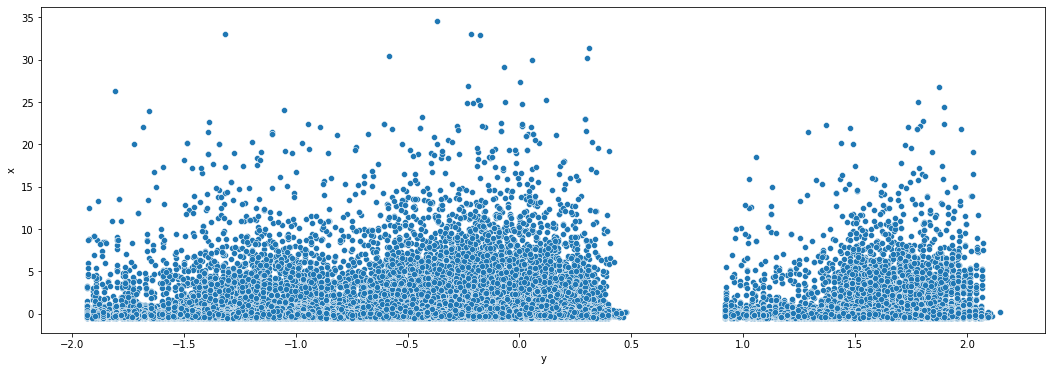

In [24]:
fig, ax = plt.subplots(figsize = (18, 6))
sns.scatterplot(data = pca_df, x = 'y',y = 'x')

### 4.3 Isolation Forest regression

In [25]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination = 0.01)
model.fit(cluster_data)

IsolationForest(contamination=0.01)

In [26]:
pca_df['fraud_or_not'] = model.predict(cluster_data)
pca_df['fraud_or_not'] = pca_df['fraud_or_not'].map({1:0, -1:1})
print(pca_df['fraud_or_not'].value_counts())

0    311476
1      3147
Name: fraud_or_not, dtype: int64


<AxesSubplot:xlabel='y', ylabel='x'>

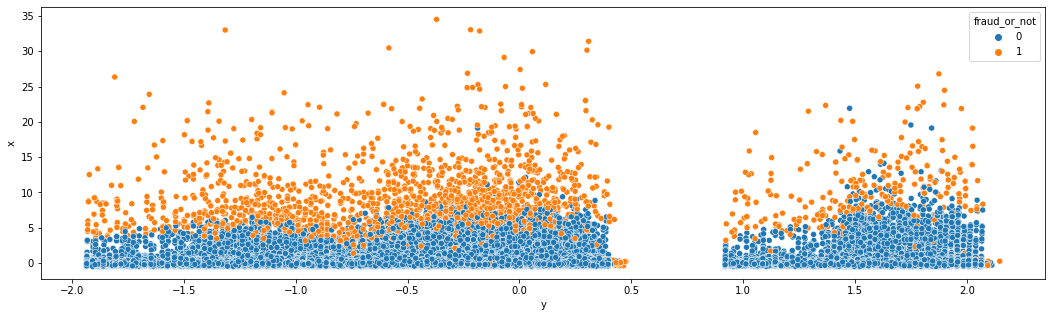

In [27]:
fig, ax = plt.subplots(figsize = (18, 5))
sns.scatterplot(data = pca_df, x = 'y', y = 'x', hue = 'fraud_or_not')

### 4.4 Fraud Detection

After classifying the transaction records into fraud or not, we can compare some features' distribution among these two groups:

In [29]:
data['fraud_or_not'] = pca_df['fraud_or_not']

<AxesSubplot:xlabel='fraud_or_not', ylabel='distance_to_home'>

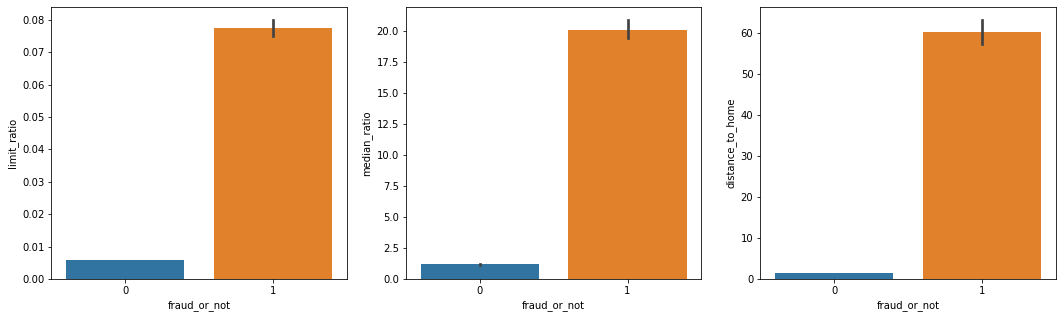

In [30]:
fig, ax = plt.subplots(1, 3, figsize = (18, 5))

sns.barplot(data = data, x = 'fraud_or_not', y = 'limit_ratio', estimator = np.mean, ax = ax[0])
sns.barplot(data = data, x = 'fraud_or_not', y = 'median_ratio', estimator = np.mean, ax = ax[1])
sns.barplot(data = data, x = 'fraud_or_not', y = 'distance_to_home', estimator = np.mean, ax = ax[2])

<AxesSubplot:xlabel='weekday', ylabel='transaction_count'>

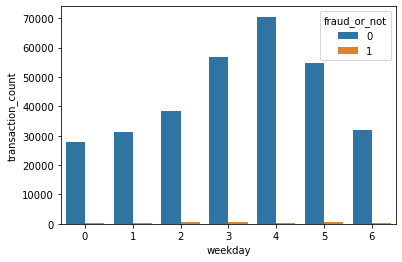

In [31]:
weekday_pivot = data.groupby(['fraud_or_not','weekday'])['credit_card'].count().reset_index(name = 'transaction_count')
sns.barplot(data=weekday_pivot, x='weekday', y='transaction_count', hue='fraud_or_not')

<AxesSubplot:xlabel='hour', ylabel='transaction_count'>

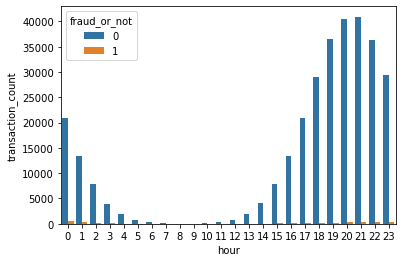

In [32]:
hour_pivot = data.groupby(['fraud_or_not','hour'])['credit_card'].count().reset_index(name = 'transaction_count')
sns.barplot(data=hour_pivot, x='hour', y='transaction_count', hue='fraud_or_not')

<AxesSubplot:xlabel='day', ylabel='transaction_count'>

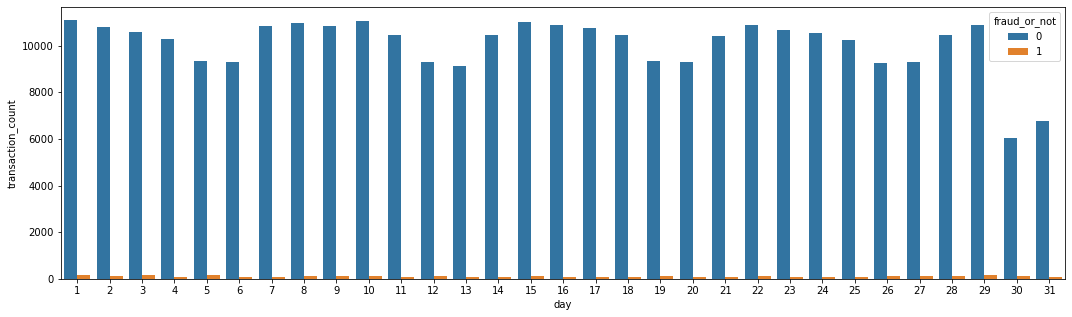

In [33]:
fig, ax = plt.subplots(figsize = (18, 5))
day_pivot = data.groupby(['fraud_or_not','day'])['credit_card'].count().reset_index(name = 'transaction_count')
sns.barplot(data=day_pivot, x='day', y='transaction_count', hue='fraud_or_not')